Hola **Camilo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo Data Analyst debes cuidar la presentación de tus notebooks por eso te recomiendo que siempre al inicio de cada notebook dejes un título general y una breve introducción al mismo en una celda Markdown, esto dará más claridad de lo que se realizará en el proyecto.
</div>

In [2]:
import pandas as pd 
import math as mt 
import numpy as np 
from scipy import stats as st 
from math import factorial 
import seaborn as sns  
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import mannwhitneyu

In [3]:
hypotheses=pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
orders=pd.read_csv('/datasets/orders_us.csv')
visits=pd.read_csv('/datasets/visits_us.csv')

hypotheses.info()
print()
orders.info()
print()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (to

### Procesamiento de datos 


Ajustaremos algunos valores de fecha en los dataframes orders y visits, así: 

In [4]:
# Convertimos columna de fecha en el dataframe orders
orders['date'] = pd.to_datetime(orders['date'])

# Verificamos duplicados
print(f'Duplicados en orders: {orders.duplicated().sum()}')

# Aseguramos tipos correctos
print(orders.dtypes)

Duplicados en orders: 0
transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                 float64
group                    object
dtype: object


In [5]:
#Para el dataframe visits, haremos lo mismo: 
# Convertimos columna de fecha
visits['date'] = pd.to_datetime(visits['date'])

# Verificamos duplicados
print(f'Duplicados en visits: {visits.duplicated().sum()}')

# Aseguramos tipos correctos
print(visits.dtypes)

Duplicados en visits: 0
date      datetime64[ns]
group             object
visits             int64
dtype: object


# Parte 1. Priorizar hipótesis

Calcularemos el ICE: 


In [6]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
ice_sorted = hypotheses.sort_values(by='ICE', ascending=False).reset_index(drop=True)

Calcularemos el RICE:

In [7]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
rice_sorted = hypotheses.sort_values(by='RICE', ascending=False).reset_index(drop=True)

Comparamos cambios de orden: 

In [8]:
ice_rank = ice_sorted[['Hypothesis']].copy()
ice_rank['ICE Rank'] = ice_rank.index + 1

rice_rank = rice_sorted[['Hypothesis']].copy()
rice_rank['RICE Rank'] = rice_rank.index + 1

comparison = pd.merge(ice_rank, rice_rank, on='Hypothesis')
comparison['Rank Change'] = comparison['ICE Rank'] - comparison['RICE Rank']
print(comparison)


                                          Hypothesis  ICE Rank  RICE Rank  \
0  Launch a promotion that gives users discounts ...         1          5   
1  Add two new channels for attracting traffic. T...         2          3   
2  Add a subscription form to all the main pages....         3          1   
3  Show banners with current offers and sales on ...         4          4   
4  Add product recommendation blocks to the store...         5          2   
5  Launch your own delivery service. This will sh...         6          7   
6  Add a customer review page. This will increase...         7          8   
7  Change the category structure. This will incre...         8          6   
8  Change the background color on the main page. ...         9          9   

   Rank Change  
0           -4  
1           -1  
2            2  
3            0  
4            3  
5           -1  
6           -1  
7            2  
8            0  


#### ¿Qué podemos concluir al respecto? 

Dentro de lo que podemos observar, podríamos deducir que: 
- RICE da más peso a hipótesis con alto "Reach".Una hipótesis que afecta a más usuarios puede tener un mayor valor total.
- Alhunas hipótesis que parecían más prioritarios según ICE bajaron de lugar con RICE si su alcance era bajo.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! Para explicar mejor las diferencias podrías apoyarte de alguna gráfica que muestre cómo cambia cada hipótesis con los diferentes frameworks
</div>

# Parte 2. Análisis del test A/B

#### Paso 1. 
Revisaremos el ingreso acumulado por grupo 

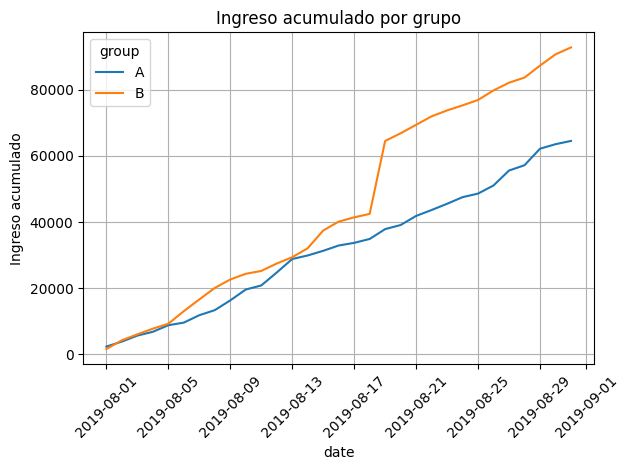

In [9]:
cumulative_revenue = orders.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum().reset_index()

sns.lineplot(data=cumulative_revenue, x='date', y='revenue', hue='group')
plt.title('Ingreso acumulado por grupo')
plt.ylabel('Ingreso acumulado')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Referente al paso 1, se presentan las siguientes observaciones al respecto: 
1. Crecimiento inicial similar:
Durante la primera mitad del experimiente (Aproximadamente hasta el 15 de agosto) ambos grupos mostraron un crecimiento del ingreso bastante similar.
2. Despegue del grupo B:
Apartir del 17 de agosto, el grupo B muestra un salto fuerte en ingresos acumulados, superando al grupo A y manteniendo esa ventaja hasta el final del experimento.
3. El grupo A tiene un crecimiento más constante.
4. El grupo B termina con mayor ingreso total acumulado. 

#### Paso 2. 
Referente al tamaño de pedido promedio acumulado: 


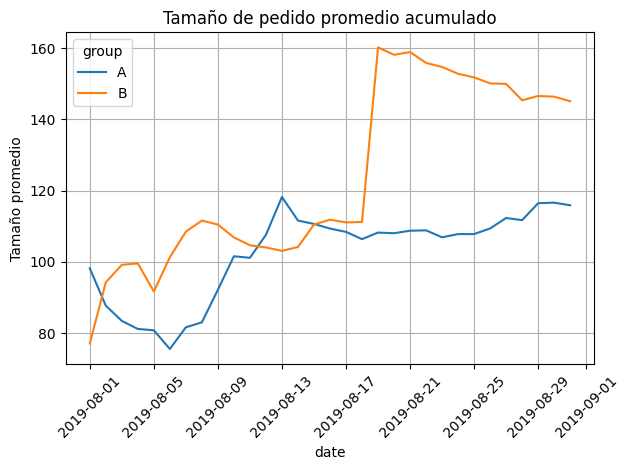

In [10]:
cumulative_avg_order = orders.groupby(['date', 'group'])['revenue'].agg(['sum', 'count']).reset_index()
cumulative_avg_order['cum_sum'] = cumulative_avg_order.groupby('group')['sum'].cumsum()
cumulative_avg_order['cum_count'] = cumulative_avg_order.groupby('group')['count'].cumsum()
cumulative_avg_order['avg_order'] = cumulative_avg_order['cum_sum'] / cumulative_avg_order['cum_count']

sns.lineplot(data=cumulative_avg_order, x='date', y='avg_order', hue='group')
plt.title('Tamaño de pedido promedio acumulado')
plt.ylabel('Tamaño promedio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Referente al paso 2, se presentan las siguientes observaciones al respecto: 

1. En los primeros días, los valores del tamaño promedio de pedido en ambos grupos son inestables, lo cual es común en las etapas iniciales de un experimento con pocos datos acumulados.
2. El grupo A mantuvo un comportamiento más estable despupés del 10 de agosto, con un tamaño prmedio oscilando entre 100 y 115 aproximadamente. Por su parte, el grupo B mostró una subida abrupta y sostenida a partir del 17 de agosto.
3. Esa subida del grupo B coincide con el mismo salto que se observó en el gráfico de ingresos acumulados, lo que sugiere que uno o más pedidos de muy alto valor están afectando significativamente el promedio.
4. El grupo B sigue manteniéndose claramente por encima del grupo A en cuanto a tamaño promedio de pedido. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente por cada grupo
</div>

#### Paso 3. 
Diferencia relativa acumulado A vs B. 
    

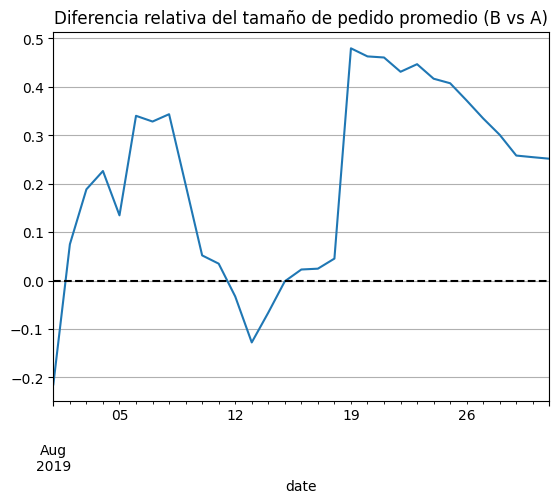

In [11]:
pivot = cumulative_avg_order.pivot(index='date', columns='group', values='avg_order')
pivot['rel_diff'] = (pivot['B'] - pivot['A']) / pivot['A']

pivot['rel_diff'].plot(title='Diferencia relativa del tamaño de pedido promedio (B vs A)')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.show()

#### Referente al paso 3, se presentan las siguientes observaciones al respecto:
1. La diferencia relativa entre grupos cambia rápidamente al inicio, subiendo y bajando de forma abrupta, debiéndose esto a que, en los primeros días, el número de pedidos es bajo, por lo que cualquier variación tiene un gran impacto porcentual.
2. Durante algunos días, el grupo B tuvo un tamaño de pedido promedio menor que el grupo A, esto indica que no hubo una ventaja consistente de B sobre A.
3. A apartir de mediados de agosto, la diferencia relativa se vuelve positiva y sostenida, esto coincide con el comportamiento observado en los gráficos anteriores.  

#### Paso 4. 
Tasa de conversión diaria 

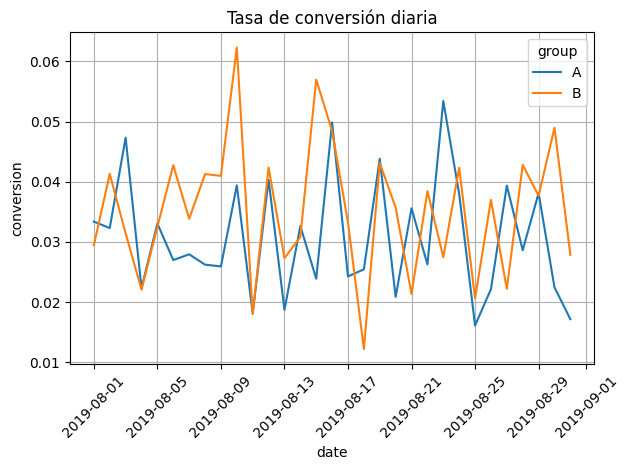

In [12]:
orders_daily = orders.groupby(['date', 'group'])['transactionId'].nunique().reset_index(name='orders')
merged = pd.merge(visits, orders_daily, how='left', on=['date', 'group']).fillna(0)
merged['conversion'] = merged['orders'] / merged['visits']

sns.lineplot(data=merged, x='date', y='conversion', hue='group')
plt.title('Tasa de conversión diaria')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Referente al paso 4, se presentan las siguientes observaciones al respecto:
1. Las tasas de conversión fluctúan bastante de un día a otro, lo que indica que el comportamiento del usuario no es completamente estable.
2. A lo largo del periodo, no se observa una diferencia persistente a favor de un grupo. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien trabajadas y analizadas las gráficas, es importante en pruebas AB siempre poder comparar de manera visual los cambios entre cada grupo
</div>

#### Paso 5.
Dispersión: pedidos por usuario 

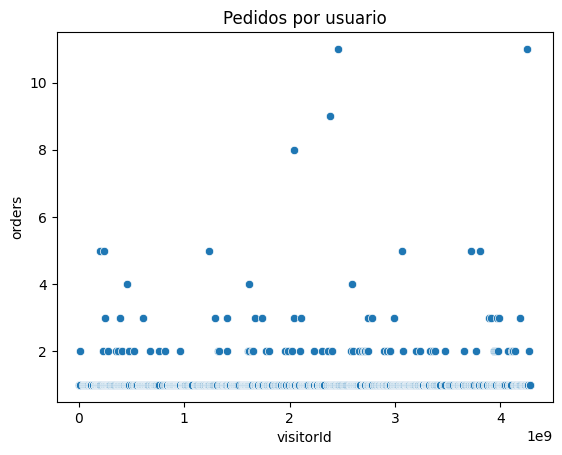

In [13]:
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique().reset_index(name='orders')
sns.scatterplot(data=orders_per_user, x='visitorId', y='orders')
plt.title('Pedidos por usuario')
plt.show()

#### Referente al paso 5, se presentan las siguientes observaciones al respecto:
1. La mayoría de los usuarios hizo solo 1 o 2 pedidos.
2. Solo un grupo muy pequeño realizó más de 5 pedidos, incluso algunos llegan a 12 pedidos, lo que es atípico y puede distorsionar estadísticas como el promedio y la conversión.
3. Para obtener métricas más representativas del comportamiento típico del usuario, conviene filtrar estos valores extremos, ya que si estos usuarios están concentrados en uno de los grupos (A o B), podrían sesgar los resultados del experimento.

#### Paso 6. 
Percentiles de pedidos por usuario 

In [14]:
import numpy as np
print('Percentiles (pedidos por usuario):', np.percentile(orders_per_user['orders'], [95, 99]))

Percentiles (pedidos por usuario): [2. 4.]


#### Referente al paso 6, se presenta la siguiente observación al respecto:
Esto quiere decir que:

El 95% de los usuarios hizo 2 pedidos o menos
El 99% de los usuarios hizo 4 pedidos o menos.

Esto confirma que el comportamiento habitual es comprar una o dos veces durante el periodo analizado y que los outliers aunque son una minoría (menos del 1%), podrían tener un impacto desproporcionado en métricas agregadas como la tasa de conversión y el ingreso promedio por usuario.

#### Paso 7. 
Dispersión: precios de los pedidos

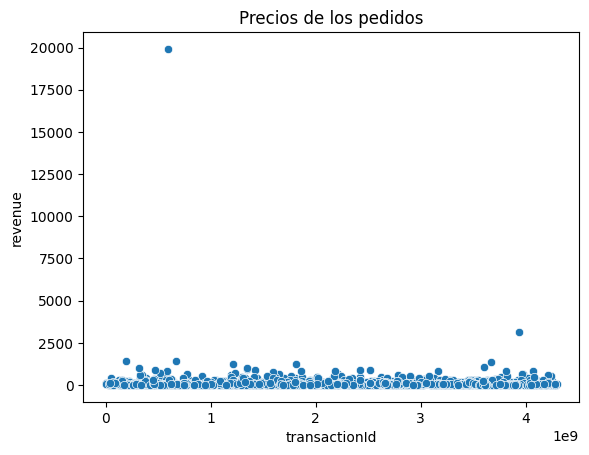

In [15]:
sns.scatterplot(data=orders, x='transactionId', y='revenue')
plt.title('Precios de los pedidos')
plt.show()


#### Referente al paso 7, se presentan las siguientes observaciones al respecto:
1. La mayoría de los pedidos se concentran en rangos bajos de ingreso (aparentemente entre 50 y 500).
2. Hay pedidos con ingresos por encima de 2.000, e incluso uno cercano a 20.000, lo cual no es representativo del comportamiento general.

Al igual que con el diagrama de dispersión para el # de pedidos, se recomienda aplicar filtros para eliminar los valores extremos del revenue para evitar distorsionar el cálculo más adelante.

#### Paso 8. 
Percentiles del precio de los pedidos


In [16]:
print('Percentiles (precio del pedido):', np.percentile(orders['revenue'], [95, 99]))

Percentiles (precio del pedido): [435.54  900.904]


#### Referente al paso 8, se presentan las siguientes observaciones al respecto:
1. Al calcular los percentiles 9 y 99 del precio de los pedidos, identificamos los siguientes percentiles:
El percentil 95 marca el punto por debajo del cual se encuentran el 95% de los pedidos más bajos.
El percentil 99 marca el umbral por debajo del cual se encuentran el 99 de los pedidos.

Por lo tanto, cualquier pedido cuyo precio esté por encima del percentil 95 puede considerarse una anomalía potencial para análisis conservador, y por encima del 99 para el análisis más estricto. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores atípicos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

#### Paso 9. 
Prueba z (conversión)

In [17]:
grouped_orders = orders.groupby('group')['visitorId'].nunique()
grouped_visits = visits.groupby('group')['visits'].sum()

zstat, pval = proportions_ztest(count=grouped_orders, nobs=grouped_visits)
print(f"z = {zstat:.3f}, p = {pval:.3f}")

z = -2.392, p = 0.017


#### Referente al paso 9, se presentan las siguientes observaciones al respecto:
El valor p (0.017) es menor al valor alpha por defecto (0.05), lo que significa que la diferencia observada en las tasas de conversión entre los grupos es estadísticamente siginificativa. 

Por otro lado, el valor Z al ser negativo, indica que el grupo B tuvo menor tasa de conversión que el grupo A, lo cual confirma que los valores atípicos pudieron estar sesgando el resultado y que el cambio introductorio en el grupo B puede no tener un efecto positivo en la conversión.

#### Paso 10. 
Prueba de Mann-Whitney (tamaño promedio)

In [18]:
group_a = orders[orders['group'] == 'A']['revenue']
group_b = orders[orders['group'] == 'B']['revenue']

u_stat, pval = mannwhitneyu(group_a, group_b)
print(f"U = {u_stat}, p = {pval}")

U = 175872.5, p = 0.6915246773264736


#### Referente al paso 10, se presentan las siguientes observaciones al respecto: 
1. El valor p=0.6915 es mucho mayor que el umbral común de significancia, esto indica que no hay evidencia estadísticamente significativa de que los tamaños promedio de los pedidos difieran entre los grupos A y B en los datos sin filtrar.

#### Paso 11. 
Significancia estadística

In [19]:
revenue_95 = orders['revenue'].quantile(0.95)

#Usuarios con muchos pedidos (percentil 95 de órdenes por usuario)
orders_per_user = orders.groupby('visitorId')['transactionId'].count()
user_order_limit = orders_per_user.quantile(0.95)

#Obtener IDs de usuarios que superan el límite de pedidos
frequent_users = orders_per_user[orders_per_user > user_order_limit].index

#Filtrar pedidos atípicos por revenue y por usuario
orders_filtered = orders[(orders['revenue'] <= revenue_95) &
    (~orders['visitorId'].isin(frequent_users))]

#Recalculamos conversiones con datos filtrados
filtered_orders_per_group = orders_filtered.groupby('group')['visitorId'].nunique()
visits_per_group = visits.groupby('group')['visits'].sum()

z_stat, pval = proportions_ztest(count=filtered_orders_per_group, nobs=visits_per_group)
print(f"Z = {z_stat:.3f}, p = {pval:.3f}")

Z = -2.466, p = 0.014


#### Referente al paso 11, se presentan las siguientes observaciones al respecto: 
1. El valor p=0.014 es menor que 0.05, lo que indica que la diferencia en las tasas de conversión entre los grupos A y B es estadísticamente significativa despues de eliminar usuarios con comportamientos atípico, esto sugiere que el cambio introducido en el grupo B tuvo un efecto real sobre la probabilidad de conversión.
2. El resultado implica que la conversión fue significativamente más baja en el grupo B comparado con el grupo A, lo cual es importante al evaluar el impacto del experimento.

#### Paso 12. 
Significancia estadística

In [20]:
group_a_f = orders_filtered[orders_filtered['group'] == 'A']['revenue']
group_b_f = orders_filtered[orders_filtered['group'] == 'B']['revenue']

u_stat, pval = mannwhitneyu(group_a_f, group_b_f)
print(f"U = {u_stat}, p = {pval}")

U = 128461.5, p = 0.7295766132829709


#### Referente al paso 12, se presetan las siguientes observaciones: 

El valor p(0.73) es muy superior al valor alpha por defecto, lo que significa que no hay evidencia suficiente para afirmar que el tamaño de los pedidos difiere entre ambos grupos una vez filtrados los valores extremos.
Aunque el grupo B tuvo una conversión significativamente menor en los puntos analizados anteriormente, el mtamaño promedio no es más alto que el de A.

#### Paso 13
Haremos un resumen de hallazgos clave: 
1. Conversión (sin filtrar): No se encontró diferencia significativa entro los grupos.
2. Tamaño promedio de pedido (sin filtrar): No hay diferencia significativa.
3. Conversión (Con datos filtrados): Sí se detectó una diferencia significativa, el grupo B tuvo una menor conversión que el grupo A.

#### Conclusión
Se puede concluir que se debe parar la prueba y considerar al grupo A como líder. 

Esto bajo las siguientes premisas: 
1. El grupo B mostró peores resultados en conversión luego de elimiar outliers, y este efecto fue estadísticamente significativo.
2. No se observó ningún beneficio significativo en el tamaño de pedido promedio que pudiera compensar la caída en la conversión.
3. Continuar la prueba probablemente no revertirá este patrón, y mantener la versión del grupo B puede incluso dañar ingresos si se implementa.
4. Dado que los datos filtrados reflejan el comportamiento genuino de los usuarios, es razonable confiar en esa versión del análisis para tomar una decisión. 

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo con las visualizaciones, los cálculos y  los ejercicios propuestos los has resuelto muy bien planteando conclusiones claras sobre los resultados obtenidos en cada paso.
    
Planteaste muy buenas conclusiones en base a tus datos que es un punto importante que deben tener tus proyectos, como Data Analyst debes buscar apoyar en la toma de decisiones basadas en datos.
    
Saludos!
</div>